In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/df_dam.csv")

idam_full = df[df['Name']=='Colo_Dam_105']
idam = idam_full[['Longitude', 'Latitude', 'Name']]
idam

,Longitude,Latitude,Name
0,-106.615059,40.967817,Colo_Dam_105
1,-106.615024,40.967862,Colo_Dam_105
2,-106.615001,40.967879,Colo_Dam_105
3,-106.614935,40.967897,Colo_Dam_105
4,-106.614881,40.967906,Colo_Dam_105
5,-106.614837,40.967888,Colo_Dam_105
6,-106.614796,40.967866,Colo_Dam_105


In [3]:
def get_centroid(dam):
    x = np.mean(dam["Latitude"])
    y = np.mean(dam["Longitude"])
    return x, y


# Sample use:
sample_centroid = get_centroid(idam)
print(sample_centroid)

(40.967873717877744, -106.61493333164904)


In [4]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from geopy.distance import geodesic
from shapely import LineString
from shapely import Point

In [6]:
coordinates_list = idam[['Latitude', 'Longitude']].values.tolist()

line = LineString(coordinates_list)
print("Total length (???):",line.length)

total_length = 0
for i in range(len(coordinates_list) - 1):
    total_length += geodesic(coordinates_list[i], coordinates_list[i+1]).meters

print("Total length (m):", total_length)

Total length (???): 0.00030306294678934207
Total length (m): 27.532708322823115


In [7]:
def find_midpoint_of_linestring(line):
    total_length = line.length
    
    half_length = total_length / 2
    
    midpoint = line.interpolate(half_length)
    
    return midpoint

midpoint = find_midpoint_of_linestring(line)

print("Midpoint of the LineString is:", midpoint.x, midpoint.y)

centroid = Point(sample_centroid)
print("Centroid of the LineString is:", centroid.x, centroid.y)

Midpoint of the LineString is: 40.96789642451913 -106.61493784152574
Centroid of the LineString is: 40.967873717877744 -106.61493333164904


In [8]:
from shapely.ops import nearest_points

projection, temp = nearest_points(line, centroid)


print("projection: ", projection.x, projection.y)

print(temp.x, temp.y)

projection:  40.96789603981515 -106.61493928416567
40.967873717877744 -106.61493333164904


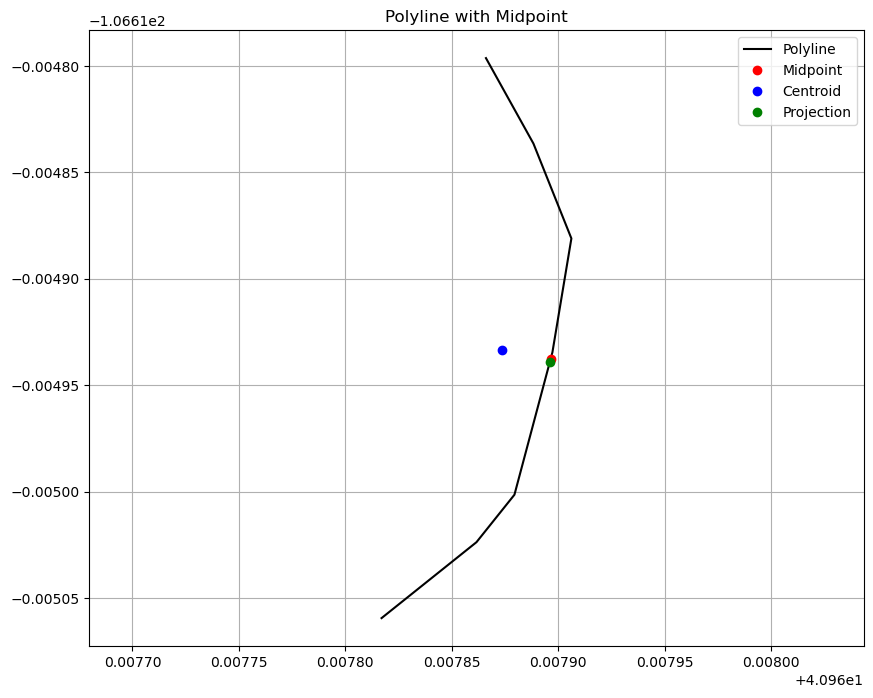

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

x, y = line.xy
ax.plot(x, y, 'k-', label='Polyline')
ax.plot(midpoint.x, midpoint.y, 'ro', label='Midpoint')
ax.plot(centroid.x, centroid.y, 'bo', label='Centroid')
ax.plot(projection.x, projection.y, 'go', label='Projection')
ax.legend()
ax.set_title('Polyline with Midpoint')
ax.grid(True)

ax.axis('equal')

plt.show()